In [1]:
import numpy as np
import pandas as pd

In [2]:
df  = pd.read_csv('/kaggle/input/diamonds/diamonds.csv')
df.drop(df.columns[0], axis=1, inplace=True)
df

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

# Dataset describtion and visualization

**price:** price in US dollars (\$326--\$18,823)

**carat:** weight of the diamond (0.2--5.01)

**cut:** quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color:** diamond colour, from J (worst) to D (best)

**clarity:** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

**x:** length in mm (0--10.74)

**y:** width in mm (0--58.9)

**z:** depth in mm (0--31.8)

**table:** width of top of diamond relative to widest point (43--95)

**depth:** total depth percentage = z / mean(x, y) = 2 * z / (x + y)  (43--79)

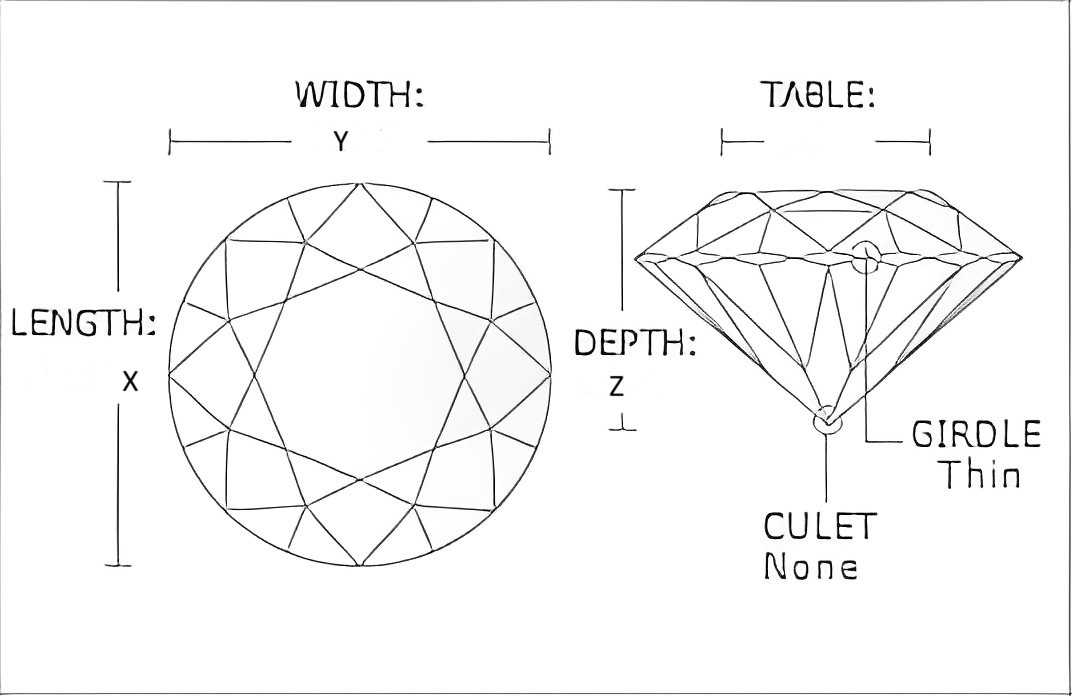

In [3]:
df.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [4]:
import matplotlib.pyplot as plt

def visualize_data(df, fig_name, numeric_features=[], categorical_features=[]):

    total_numeric_features = len(numeric_features)
    total_categorical_features = len(categorical_features)
    
    total_features = total_numeric_features + total_categorical_features
    
    # Adjust the number of rows and columns based on the total number of features
    num_rows = 2
    
    # Calculate the number of columns based on the total number of features
    num_cols = int(np.ceil(total_features / num_rows))
    
    # Create subplots based on the calculated number of rows and columns
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(24, 6 * num_rows))
    axes = axes.ravel()

    
    for i, feature in enumerate(numeric_features):
        ax = axes[i]
        values, edges, patches = ax.hist(df[feature], bins=7, edgecolor='k')
        ax.set_title(f'Histogram of {feature}', fontsize=22)
        ax.set_xlabel(feature,  fontsize=18)
        ax.set_ylabel('Frequency',  fontsize=18)
        ax.set_xticks([])
        # Display values at the edges of every bin
        bins = []
        for i in range(len(edges) - 1):
            bin_start = edges[i]
            bin_end = edges[i + 1]
            
            bins.append(bin_start)
            bins.append(bin_end)
            bin_center = (bin_start + bin_end) / 2
            freq = values[i]
            if int(freq) > 5000:
                ax.text(bin_center, freq / 2, str(int(freq)),
                        ha='center', va='center', color='white',  fontsize=20,rotation=90)
            else:
                ax.text(bin_center, freq + 500, str(int(freq)),
                        ha='center', va='bottom',  fontsize=20, rotation=90)
        
        ax.set_xticks(bins)
        ax.tick_params(axis='x', labelrotation=90)
        
    for i, col in enumerate(categorical_features):
        ax = axes[i + len(numeric_features)]
        frequencies = df[col].value_counts()
        bars = ax.bar(frequencies.index, frequencies.values)
        ax.set_title(f'{col}', fontsize=22)
        ax.set_xlabel('Categories',  fontsize=18)
        ax.set_ylabel('Frequency',  fontsize=18)

        for bar, freq in zip(bars, frequencies.values):
            if freq > 2000:
                ax.text(bar.get_x() + bar.get_width() / 2, freq / 2, str(freq),
                        ha='center', va='center', color='white', fontsize=20, rotation=90)
            else:
                ax.text(bar.get_x() + bar.get_width() / 2, freq + 200 , str(freq),
                        ha='center', va='bottom', fontsize=20, rotation=90)
    # Remove unused subplots
    for i in range(total_features, len(axes)):
        fig.delaxes(axes[i])
    
        
    plt.tight_layout()
    plt.savefig(f"{fig_name}.png", format='png', dpi=900)
    plt.show()

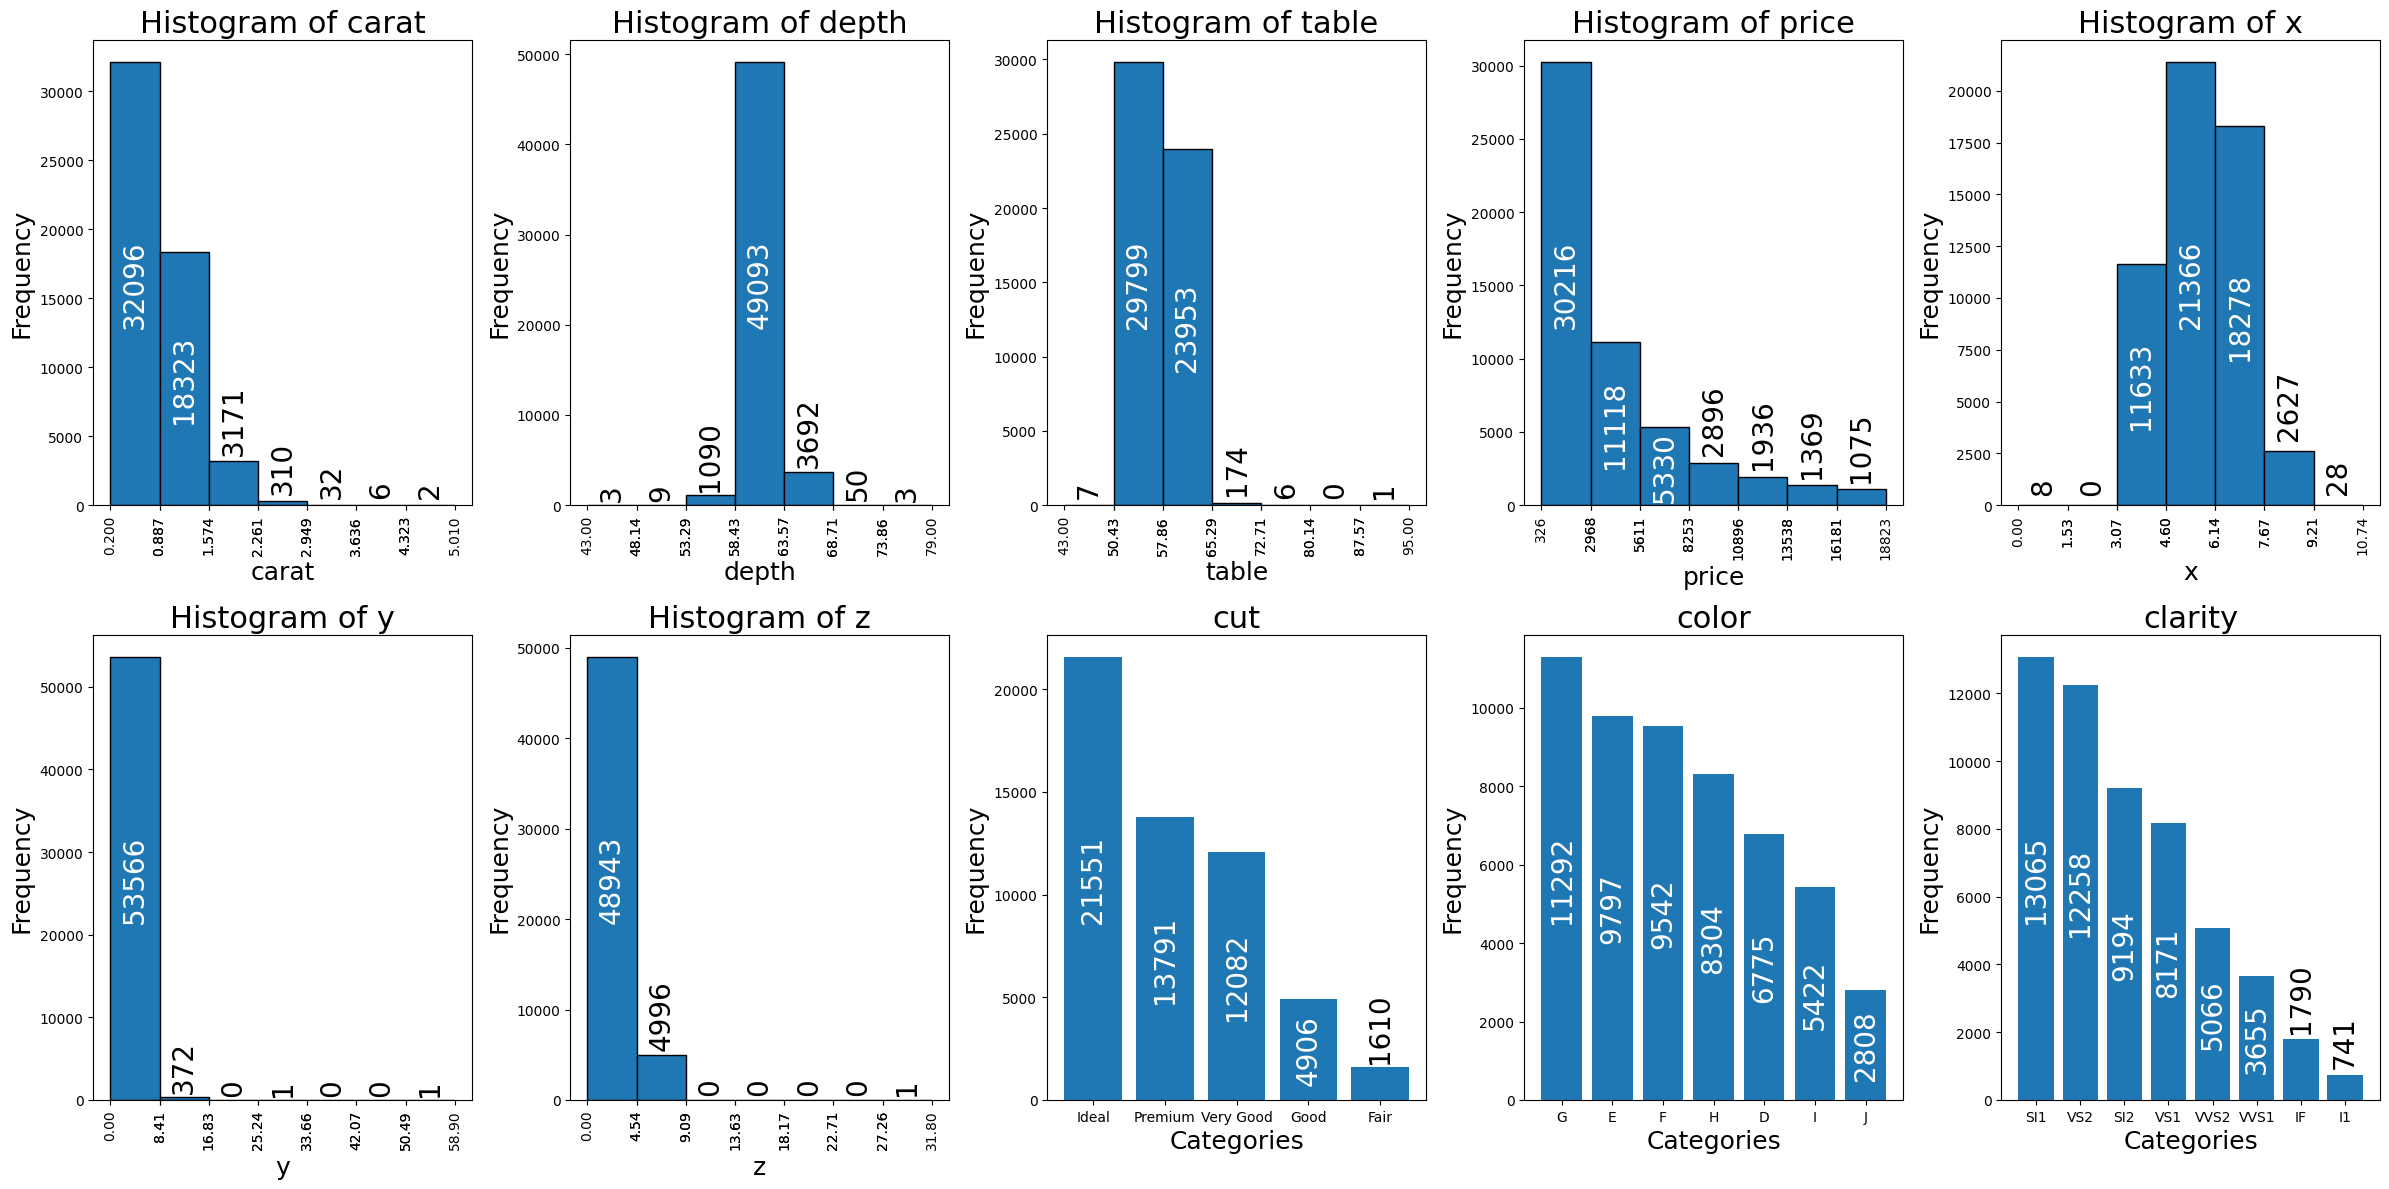

In [5]:
numeric_features = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']

visualize_data(df,'Data Visualization',numeric_features,categorical_features )

In [12]:
from pandas_profiling import ProfileReport
report = ProfileReport(df)
report.to_file("profile_report.html")
report.to_notebook_iframe()

# Encoding categorical features based on their ordinal order

In [7]:
cut_label_mapping = {
   'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4
}
color_label_mapping = {
    'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6
}
clarity_label_mapping = {
    'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7
}

df['color'] = df['color'].map(color_label_mapping)
df['cut'] = df['cut'].map(cut_label_mapping)
df['clarity'] = df['clarity'].map(clarity_label_mapping)
df

carat  cut  color  clarity  depth  table  price     x     y     z
0       0.23    4      5        1   61.5   55.0    326  3.95  3.98  2.43
1       0.21    3      5        2   59.8   61.0    326  3.89  3.84  2.31
2       0.23    1      5        4   56.9   65.0    327  4.05  4.07  2.31
3       0.29    3      1        3   62.4   58.0    334  4.20  4.23  2.63
4       0.31    1      0        1   63.3   58.0    335  4.34  4.35  2.75
...      ...  ...    ...      ...    ...    ...    ...   ...   ...   ...
53935   0.72    4      6        2   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72    1      6        2   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70    2      6        2   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    3      2        1   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75    4      6        1   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

In [8]:
y = df[['price']]
X = df.drop('price', axis=1)
X , y

(       carat  cut  color  clarity  depth  table     x     y     z
 0       0.23    4      5        1   61.5   55.0  3.95  3.98  2.43
 1       0.21    3      5        2   59.8   61.0  3.89  3.84  2.31
 2       0.23    1      5        4   56.9   65.0  4.05  4.07  2.31
 3       0.29    3      1        3   62.4   58.0  4.20  4.23  2.63
 4       0.31    1      0        1   63.3   58.0  4.34  4.35  2.75
 ...      ...  ...    ...      ...    ...    ...   ...   ...   ...
 53935   0.72    4      6        2   60.8   57.0  5.75  5.76  3.50
 53936   0.72    1      6        2   63.1   55.0  5.69  5.75  3.61
 53937   0.70    2      6        2   62.8   60.0  5.66  5.68  3.56
 53938   0.86    3      2        1   61.0   58.0  6.15  6.12  3.74
 53939   0.75    4      6        1   62.2   55.0  5.83  5.87  3.64
 
 [53940 rows x 9 columns],
        price
 0        326
 1        326
 2        327
 3        334
 4        335
 ...      ...
 53935   2757
 53936   2757
 53937   2757
 53938   2757
 53939   2757

# Feature scalling 

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[:] = scaler.fit_transform(X[:])
X 

carat   cut     color   clarity     depth     table         x  \
0      0.006237  1.00  0.833333  0.142857  0.513889  0.230769  0.367784   
1      0.002079  0.75  0.833333  0.285714  0.466667  0.346154  0.362197   
2      0.006237  0.25  0.833333  0.571429  0.386111  0.423077  0.377095   
3      0.018711  0.75  0.166667  0.428571  0.538889  0.288462  0.391061   
4      0.022869  0.25  0.000000  0.142857  0.563889  0.288462  0.404097   
...         ...   ...       ...       ...       ...       ...       ...   
53935  0.108108  1.00  1.000000  0.285714  0.494444  0.269231  0.535382   
53936  0.108108  0.25  1.000000  0.285714  0.558333  0.230769  0.529795   
53937  0.103950  0.50  1.000000  0.285714  0.550000  0.326923  0.527002   
53938  0.137214  0.75  0.333333  0.142857  0.500000  0.288462  0.572626   
53939  0.114345  1.00  1.000000  0.142857  0.533333  0.230769  0.542831   

              y         z  
0      0.067572  0.076415  
1      0.065195  0.072642  
2      0.069100  0.072642  
3      0.071817  0.082704  
4      0.073854  0.086478  
...         ...       ...  
53935  0.097793  0.110063  
53936  0.097623  0.113522  
53937  0.096435  0.111950  
53938  0.103905  0.117610  
53939  0.099660  0.114465  

[53940 rows x 9 columns]

In [10]:
from pickle import dump

with open('scaler.pkl', 'wb') as file:
    dump(scaler, file)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

print('No. of training samples:',len(y_train))
print('No. of testing samples:',len(y_test))

No. of training samples: 43152
No. of testing samples: 10788


# Fitting with all features 

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

LR = LinearRegression()
LR.fit(X_train , y_train)
y_pred = LR.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2): {r2:.7f}')

Mean Squared Error (MSE): 1492535.35
Mean Absolute Error (MAE): 811.16
R-squared (R2): 0.9061496


# Fitting with highies correlated features with the price [carat, x, y, z]

In [14]:
LR1 = LinearRegression()
LR1.fit(X_train[['carat','x','y','z']] , y_train)
y_pred = LR1.predict(X_test[['carat','x','y','z']])

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2): {r2:.7f}')

Mean Squared Error (MSE): 2397973.15
Mean Absolute Error (MAE): 909.45
R-squared (R2): 0.8492158


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Define a list of regressors
regressors = [
    LinearRegression(),
    DecisionTreeRegressor(),
    SVR(),
    MLPRegressor()
]

# Create an empty list to store the results
results = []
fitted_regressors = {}

# Iterate over each regressor
for regressor in regressors:
    
    # Fit the regressor on the training data
    regressor.fit(X_train, y_train)
    # Make predictions on the test data
    y_pred = regressor.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Get the name of the regressor
    regressor_name = regressor.__class__.__name__
    # Append results to the list
    results.append([regressor_name, mse, mae, r2])
    fitted_regressors[regressor_name] = regressor

# Create a DataFrame from the list of results with column names
results_df = pd.DataFrame(results, columns=['Regressor', 'MSE', 'MAE', 'R2'])
results_df['MSE'] = results_df['MSE'].apply(lambda x: '{:.2f}'.format(x))
results_df['MAE'] = results_df['MAE'].apply(lambda x: '{:.2f}'.format(x))

# Print the results DataFrame
results_df

Regressor          MSE      MAE        R2
0       LinearRegression   1492535.35   811.16  0.906150
1  DecisionTreeRegressor    561965.17   359.68  0.964664
2                    SVR  11168952.50  1920.16  0.297698
3           MLPRegressor   1691029.00   944.06  0.893668

In [21]:
from sklearn.ensemble import RandomForestRegressor

rf_results = []
rf_fitted_regressors = {}

for i in [50, 100, 150, 200, 250, 300]:
    
    regressor = RandomForestRegressor(n_estimators=i)
    regressor.fit(X_train, y_train)

    y_pred = regressor.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Get the name of the regressor
    regressor_name = regressor.__class__.__name__ +f'_n={i}'
    
    rf_results.append([regressor_name, mse, mae, r2])
    rf_fitted_regressors[regressor_name] = regressor


rf_results_df = pd.DataFrame(rf_results, columns=['Regressor', 'MSE', 'MAE', 'R2'])
rf_results_df['MSE'] = rf_results_df['MSE'].apply(lambda x: '{:.2f}'.format(x))
rf_results_df['MAE'] = rf_results_df['MAE'].apply(lambda x: '{:.2f}'.format(x))

rf_results_df

Regressor        MSE     MAE        R2
0   RandomForestRegressor_n=50  316868.40  275.03  0.980075
1  RandomForestRegressor_n=100  316820.58  273.69  0.980078
2  RandomForestRegressor_n=150  315192.45  273.56  0.980181
3  RandomForestRegressor_n=200  317126.84  273.09  0.980059
4  RandomForestRegressor_n=250  315197.28  273.25  0.980180
5  RandomForestRegressor_n=300  315874.12  272.99  0.980138

In [17]:
from sklearn.neighbors import KNeighborsRegressor

kn_results = []
kn_fitted_regressors = {}

for i in [3,5,7,9,11,13]:
    
    regressor = KNeighborsRegressor(n_neighbors=i)
    regressor.fit(X_train, y_train)

    y_pred = regressor.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Get the name of the regressor
    regressor_name = regressor.__class__.__name__ +f'_n={i}'
    
    kn_results.append([regressor_name, mse, mae, r2])
    kn_fitted_regressors[regressor_name] = regressor


kn_results_df = pd.DataFrame(kn_results, columns=['Regressor', 'MSE', 'MAE', 'R2'])
kn_results_df['MSE'] = kn_results_df['MSE'].apply(lambda x: '{:.2f}'.format(x))
kn_results_df['MAE'] = kn_results_df['MAE'].apply(lambda x: '{:.2f}'.format(x))

kn_results_df

Regressor        MSE     MAE        R2
0   KNeighborsRegressor_n=3  533839.73  374.70  0.966432
1   KNeighborsRegressor_n=5  555840.27  376.65  0.965049
2   KNeighborsRegressor_n=7  560219.40  376.96  0.964773
3   KNeighborsRegressor_n=9  572656.57  381.07  0.963991
4  KNeighborsRegressor_n=11  585846.07  387.10  0.963162
5  KNeighborsRegressor_n=13  608806.14  394.71  0.961718

In [18]:
results = pd.concat([results_df, rf_results_df, kn_results_df],axis=0,ignore_index=True)
results.to_csv('results.csv')
results

Regressor          MSE      MAE        R2
0              LinearRegression   1492535.35   811.16  0.906150
1         DecisionTreeRegressor    561965.17   359.68  0.964664
2                           SVR  11168952.50  1920.16  0.297698
3                  MLPRegressor   1691029.00   944.06  0.893668
4    RandomForestRegressor_n=50    316868.40   275.03  0.980075
5   RandomForestRegressor_n=100    316820.58   273.69  0.980078
6   RandomForestRegressor_n=150    315192.45   273.56  0.980181
7   RandomForestRegressor_n=200    317126.84   273.09  0.980059
8   RandomForestRegressor_n=250    315197.28   273.25  0.980180
9   RandomForestRegressor_n=300    315874.12   272.99  0.980138
10      KNeighborsRegressor_n=3    533839.73   374.70  0.966432
11      KNeighborsRegressor_n=5    555840.27   376.65  0.965049
12      KNeighborsRegressor_n=7    560219.40   376.96  0.964773
13      KNeighborsRegressor_n=9    572656.57   381.07  0.963991
14     KNeighborsRegressor_n=11    585846.07   387.10  0.963162
15     KNeighborsRegressor_n=13    608806.14   394.71  0.961718

In [19]:
# getting the regressor with the best results 
results[results['R2'] == results['R2'].max()]

Regressor        MSE     MAE        R2
6  RandomForestRegressor_n=150  315192.45  273.56  0.980181

In [23]:
from pickle import dump

with open('RandomForestRegressor_n=150.pkl', 'wb') as file:
    dump(rf_fitted_regressors['RandomForestRegressor_n=150'], file)

# Deployment 

In [24]:
# define a preprocessing function 
def preprocess(sample):
    from pickle import load

    cut_label_mapping = {
   'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4
    }
    color_label_mapping = {
    'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6 
    }
    clarity_label_mapping = {
    'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7
    }
    
    # label mapping of categorical features
    sample[1] = cut_label_mapping[sample[1]]
    sample[2] = color_label_mapping[sample[2]]
    sample[3] = clarity_label_mapping[sample[3]]
    
    # feature scalling    
    with open('scaler.pkl', 'rb') as file:
        scaler = load(file)
        
    sample = scaler.transform([sample])
    
    return sample
    

In [28]:
# make prediction on a new data sample
sample = [0.23, 'Ideal', 'E', 'SI2', 61.5, 55, 3.95, 3.98, 2.43]
sample = preprocess(sample)

from pickle import load 

with open('RandomForestRegressor_n=200.pkl', 'rb') as file:
    RandomForestRegressor = load(file)
    
pred = RandomForestRegressor.predict(sample)
pred[0]

385.70666666666665